In [1]:
#All code present was constructed by and is the explicit property of Kerry Hall.
#Datasets gathered from Armfield Absorption Column in Unit Operations class.
import numpy as np
import pandas as pd
import scipy as sc
from pandas import DataFrame as df
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
COLUMN_RADIUS = 0.4 # m
AIR_DENSITY = 1.29 # g/L
WATER_DENSITY = 998 #g/L
#THIS DATA IS RAGGED, comparison accuracy would be increased by obtaining the same number of data points across the board, liquid flowrates assumed discrete to simplify dataset
AIR_WATER_FLOW_PRESSURE_dict = {
    
    0 : {"Air_flow" : np.round(np.array([100.8, 144.9, 154.5, 161.2, 175.5, 184.7, 195, 199.6,])*AIR_DENSITY/(COLUMN_RADIUS**2*np.pi), 2), # L/min * g/L * 1/m^2 = g/(m^2 * min), AIR MASS VELOCITY 
    'Pressure_Drop' : np.array([0.9, 1.7, 2, 2.2, 2.5, 3.1, 3.7, 3.9,]),}, # mbar
    1 : {"Air_flow" : np.round(np.array([30.1, 59.6, 89.9, 120.2, 148.6, 167.3,])*AIR_DENSITY/(COLUMN_RADIUS**2*np.pi), 2), # L/min * g/L * 1/m^2 = g/(m^2 * min), AIR MASS VELOCITY 
    'Pressure_Drop' : np.array([2.7, 8.9, 18.7, 30.1, 43.5, 50.1,]),}, # mbar
    2 : {"Air_flow" : np.round(np.array([27.5, 58.8, 89.5, 120.8, 148.1,])*AIR_DENSITY/(COLUMN_RADIUS**2*np.pi), 2), # L/min * g/L * 1/m^2 = g/(m^2 * min), AIR MASS VELOCITY 
    'Pressure_Drop' : np.array([4.1, 9.5, 19.5, 31.7, 47.2,]),}, # mbar
    3 : {"Air_flow" : np.round(np.array([31.0, 58.8, 89.5, 117.5, 147.3,])*AIR_DENSITY/(COLUMN_RADIUS**2*np.pi), 2), # L/min * g/L * 1/m^2 = g/(m^2 * min), AIR MASS VELOCITY 
    'Pressure_Drop' : np.array([3.2, 10.0, 20.8, 33.6, 50.9,]),}, # mbar
    4 : {"Air_flow" : np.round(np.array([31.4, 49.8, 70.2, 89.5, 107.6,])*AIR_DENSITY/(COLUMN_RADIUS**2*np.pi), 2), # L/min * g/L * 1/m^2 = g/(m^2 * min), AIR MASS VELOCITY 
    'Pressure_Drop' : np.array([3.9, 9.0, 16.0, 24.8, 37.5,]),}, # mbar
    5 : {"Air_flow" : np.round(np.array([30.2, 60.6, 90.0, 118.0, 101.1,])*AIR_DENSITY/(COLUMN_RADIUS**2*np.pi), 2), # L/min * g/L * 1/m^2 = g/(m^2 * min), AIR MASS VELOCITY 
    'Pressure_Drop' : np.array([4.0, 14.6, 32.1, 45.6, 41.5,]),}, # mbar
    6 : {"Air_flow" : np.round(np.array([29.2, 46.3, 60.5, 50.9, 37.5,])*AIR_DENSITY/(COLUMN_RADIUS**2*np.pi), 2), # L/min * g/L * 1/m^2 = g/(m^2 * min), AIR MASS VELOCITY 
    'Pressure_Drop' : np.array([5.5, 11.1, 20.2, 16.6, 8.0,]),}, # mbar
    7 : {"Air_flow" : np.round(np.array([30.1, 40.2, 50.5, 59.2, 54.0, 45.0,])*AIR_DENSITY/(COLUMN_RADIUS**2*np.pi), 2), # L/min * g/L * 1/m^2 = g/(m^2 * min), AIR MASS VELOCITY 
    'Pressure_Drop' : np.array([7.7, 12.6, 23.3, 30.6, 34.4, 15.7,]),}, # mbar
}
print("\nHere is the 3D ragged dataset:")
display(df.from_dict(AIR_WATER_FLOW_PRESSURE_dict))
FLOOD_list = np.array([[4.8, 118,],
                       [6.1, 60.5,],
                       [7, 59.2,],])
FLOOD_frame = df(FLOOD_list)
FLOOD_frame.rename(columns = {0:"Liquid Flowrate", 1:"Gas Flowrate"}, inplace = True)


Here is the 3D ragged dataset:


,0,1,2,3,4,5,6,7
Air_flow,"[258.69, 371.87, 396.5, 413.7, 450.4, 474.01, ...","[77.25, 152.96, 230.72, 308.48, 381.36, 429.35]","[70.58, 150.9, 229.69, 310.02, 380.08]","[79.56, 150.9, 229.69, 301.55, 378.03]","[80.58, 127.81, 180.16, 229.69, 276.14]","[77.5, 155.52, 230.97, 302.83, 259.46]","[74.94, 118.82, 155.27, 130.63, 96.24]","[77.25, 103.17, 129.6, 151.93, 138.58, 115.49]"
Pressure_Drop,"[0.9, 1.7, 2.0, 2.2, 2.5, 3.1, 3.7, 3.9]","[2.7, 8.9, 18.7, 30.1, 43.5, 50.1]","[4.1, 9.5, 19.5, 31.7, 47.2]","[3.2, 10.0, 20.8, 33.6, 50.9]","[3.9, 9.0, 16.0, 24.8, 37.5]","[4.0, 14.6, 32.1, 45.6, 41.5]","[5.5, 11.1, 20.2, 16.6, 8.0]","[7.7, 12.6, 23.3, 30.6, 34.4, 15.7]"



The expected relationship for pressure drop as a function of gas flowrate is: P = a * e^(b * f) 
Values for a and b are determined with the Scipy Optimize module.

The water flowrate is: 0


,Air_flow,Pressure_Drop
0,258.69,0.9
1,371.87,1.7
2,396.50,2.0
3,413.70,2.2
4,450.40,2.5
5,474.01,3.1
6,500.44,3.7
7,512.25,3.9


The minimized covariance matrix is:
[[ 4.37779445e-04 -4.99189344e-06]
 [-4.99189344e-06  5.75453252e-08]]
(closer to zero is better)
a is: 0.1849
b is: 0.005948

The water flowrate is: 1


,Air_flow,Pressure_Drop
0,77.25,2.7
1,152.96,8.9
2,230.72,18.7
3,308.48,30.1
4,381.36,43.5
5,429.35,50.1


The minimized covariance matrix is:
[[ 1.68023729e+00 -8.87719869e-04]
 [-8.87719869e-04  4.85645485e-07]]
(closer to zero is better)
a is: 4.8152
b is: 0.005591

The water flowrate is: 2


,Air_flow,Pressure_Drop
0,70.58,4.1
1,150.90,9.5
2,229.69,19.5
3,310.02,31.7
4,380.08,47.2


The minimized covariance matrix is:
[[ 4.59693677e-01 -3.30148716e-04]
 [-3.30148716e-04  2.45659154e-07]]
(closer to zero is better)
a is: 3.9607
b is: 0.006569

The water flowrate is: 3


,Air_flow,Pressure_Drop
0,79.56,3.2
1,150.90,10.0
2,229.69,20.8
3,301.55,33.6
4,378.03,50.9


The minimized covariance matrix is:
[[ 9.49975284e-01 -6.74026367e-04]
 [-6.74026367e-04  4.95585910e-07]]
(closer to zero is better)
a is: 4.0276
b is: 0.00678

The water flowrate is: 4


,Air_flow,Pressure_Drop
0,80.58,3.9
1,127.81,9.0
2,180.16,16.0
3,229.69,24.8
4,276.14,37.5


The minimized covariance matrix is:
[[ 1.58176855e-01 -2.36218562e-04]
 [-2.36218562e-04  3.63618128e-07]]
(closer to zero is better)
a is: 2.6227
b is: 0.009679

The water flowrate is: 5


,Air_flow,Pressure_Drop
0,77.50,4.0
1,155.52,14.6
2,230.97,32.1
3,302.83,45.6
4,259.46,41.5


The minimized covariance matrix is:
[[ 5.25605757e+00 -3.73736330e-03]
 [-3.73736330e-03  2.73746411e-06]]
(closer to zero is better)
a is: 5.1018
b is: 0.007526

The water flowrate is: 6


,Air_flow,Pressure_Drop
0,74.94,5.5
1,118.82,11.1
2,155.27,20.2
3,130.63,16.6
4,96.24,8.0


The minimized covariance matrix is:
[[ 3.40140384e-01 -1.29266681e-03]
 [-1.29266681e-03  5.04893744e-06]]
(closer to zero is better)
a is: 1.8837
b is: 0.015525

The water flowrate is: 7


,Air_flow,Pressure_Drop
0,77.25,7.7
1,103.17,12.6
2,129.60,23.3
3,151.93,30.6
4,138.58,34.4
5,115.49,15.7


The minimized covariance matrix is:
[[ 1.64635213e+00 -5.78790497e-03]
 [-5.78790497e-03  2.06839159e-05]]
(closer to zero is better)
a is: 2.055
b is: 0.018612



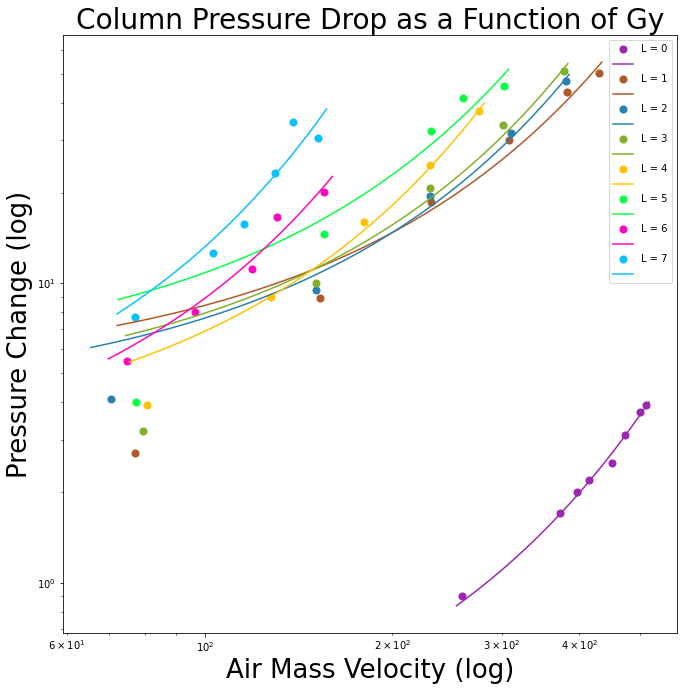

In [3]:
def expected_relationship(G, a, b): return a * np.exp(b * G)

fig, ax = plt.subplots(figsize=(11,11),)
ax.set_yscale('log')
ax.set_xscale('log')
color_list = ["#9b27b0", "#b05727", "#2780b0", "#80b027","#ffc105","#05ff44", "#ff05c1", "#05c1ff",]
print("\nThe expected relationship for pressure drop as a function of gas flowrate is: P = a * e^(b * f)",
      "\nValues for a and b are determined with the Scipy Optimize module.\n")
for each in AIR_WATER_FLOW_PRESSURE_dict: 
    print("The water flowrate is:", each)
    display(df.from_dict(AIR_WATER_FLOW_PRESSURE_dict.get(each)))
    x = AIR_WATER_FLOW_PRESSURE_dict.get(each).get('Air_flow')
    y = AIR_WATER_FLOW_PRESSURE_dict.get(each).get('Pressure_Drop')
    coeff, cov = sc.optimize.curve_fit(expected_relationship, x, y,p0=(0.21,0.015,))

    print("The minimized covariance matrix is:\n" + str(cov), "(closer to zero is better)", 
          "a is: " + str(np.round(coeff[0], 4)), 
          "b is: " + str(np.round(coeff[1], 6)), sep="\n", end="\n\n")
    
    ax.scatter(x, y, marker="o", s=50, c=color_list[each], label="L = "+str(each),)
    x_range = np.linspace(np.min(x)-5, np.max(x)+5, 500)
    ax.plot(x_range, expected_relationship(x_range, coeff[0], coeff[1]), c=color_list[each], linewidth=1.5,label=" ")
    
ax.legend()
plt.title("Column Pressure Drop as a Function of Gy", fontsize=28)
ax.set_ylabel("Pressure Change (log)", fontsize="26")
ax.set_xlabel("Air Mass Velocity (log)", fontsize="26")
plt.show()

There is significant error in the curves generated. There appears to be a non-linear relationship at low air velocities as evidenced by the clump of points not approximated by curves on the left of the graph. This could also be due to the method of curve generation used. The Scipy Optimize module adds bias to heavier values for exponential fitting. I believe that this is a result of the former and not the latter mainly due to the fact that the dry curve is almost modeled perfectly with the chosen method of fitting. The model also fits the higher liquid flowrates better than the middle ones, further supporting that there is strange behavior occuring at low gas/liquid flowrates.

,Liquid Flowrate,Gas Flowrate
0,4.8,118.0
1,6.1,60.5
2,7.0,59.2


The generated curve is a poor estimate. This data is questionable at best.
The minimized covariance matrix is:
[[ 3.01348928e+23 -3.11847479e+11]
 [-3.11847479e+11  3.22789544e-01]]
(closer to zero is better)
a is: 104281586568.0
b is: -2.15
The chosen relationship between the Gas and Liquid flowrates at flooding is: Gy = a * Gx^(b)


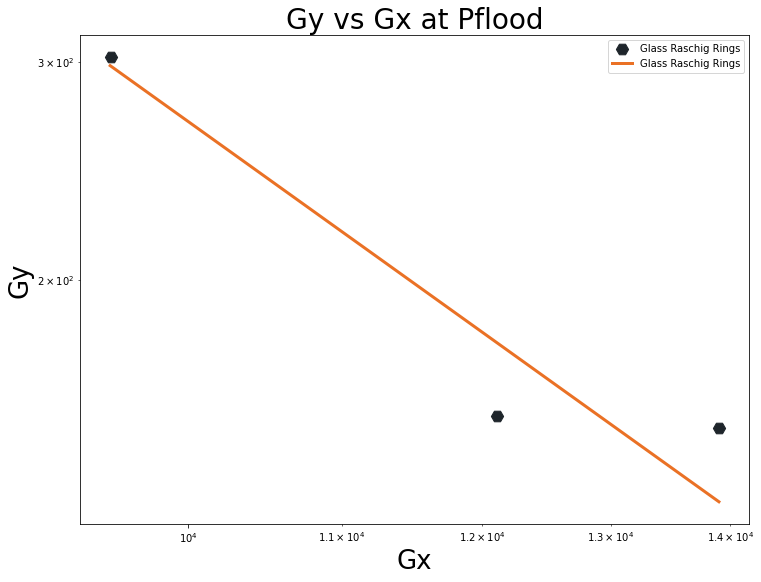

In [4]:
def shift_relationship(G, a, b): return a*G**b
display(np.round(FLOOD_frame,2))

x = FLOOD_frame["Liquid Flowrate"]*WATER_DENSITY/(COLUMN_RADIUS**2*np.pi)
y = FLOOD_frame["Gas Flowrate"]*AIR_DENSITY/(COLUMN_RADIUS**2*np.pi)

coeff, cov = sc.optimize.curve_fit(shift_relationship, x, y, p0=(2000,-1,))

print("The generated curve is a poor estimate. This data is questionable at best.", 
      "The minimized covariance matrix is:\n" + str(cov), "(closer to zero is better)", 
      "a is: " + str(np.round(coeff[0], 0)), 
      "b is: " + str(np.round(coeff[1], 2)), 
      "The chosen relationship between the Gas and Liquid flowrates at flooding is: Gy = a * Gx^(b)", sep="\n")
fig, ax = plt.subplots(figsize=(12,9),)
ax.set_yscale('log')
ax.set_xscale('log')
ax.scatter(x, y, marker="H", s=150, c="#1E252B", label="Glass Raschig Rings") #CU palette
ax.plot(np.linspace(np.min(x)-2, np.max(x)+2, 55), shift_relationship(np.linspace(np.min(x)-2, np.max(x)+2, 55), coeff[0], coeff[1]), c="#EA7125", linewidth=3, label="Glass Raschig Rings") #CU palette
ax.legend()
ax.set_ylabel("Gy", fontsize="26")
ax.set_xlabel("Gx", fontsize="26")
plt.title("Gy vs Gx at Pflood", fontsize=28)
plt.show()